In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import random
import math
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import sys

module_path = '/Users/pasqualini'

if module_path not in sys.path:
    
    sys.path.append(module_path)
    
    import omico as om
    
    #from omico import plot as pl
    from omico import fit as ft
    from omico import analysis as an
    from omico import table as tb

In [3]:
import scipy 
import scipy.special as sc

In [4]:
PROJ_ROOT = '..'

DATA_DIR = os.path.join(PROJ_ROOT,'data/')

# data
TABLE_DIR = os.path.join(PROJ_ROOT,'data/JKR2/')

# metadata
METADATA_DIR = os.path.join(PROJ_ROOT,'data/metadata/AGGREGATED')

In [6]:
# load raw tables from the two sequence alignment

ref_raw = pd.read_csv(os.path.join(TABLE_DIR,'ref_table.csv'),index_col='taxon_name',sep='\t').fillna(0)
pfam_raw = pd.read_csv(os.path.join(TABLE_DIR,'pfam_table.csv'),index_col='taxon_name',sep='\t').fillna(0)

tot_reads=ref_raw.sum(axis=0).sort_values()

nop = ['unclassified', 'cannot be assigned to a (non-viral) species', 'Viruses']

ref_raw=ref_raw.drop(nop)
pfam_raw=pfam_raw.drop(nop)

In [17]:
core_cut=10

# load you data, this can be a pd.read_cav as well
core_raw = tb.core_protocol(std_t=ref_raw,core_t=pfam_raw,core_cut=core_cut)
core_raw.head()

,SRR6468623,ERR4775823,SRR6468624,ERR4775874,SRR6468569,ERR4776013,SRR6468712,SRR5935740,SRR5946910,SRR6468575,...,SRR6468635,SRR6468683,ERR4775831,SRR6468513,ERR4775950,ERR4775955,ERR4775614,SRR6468508,ERR4775666,SRR6468642
taxon_name,,,,,,,,,,,,,,,,,,,,,
Alcanivorax dieselolei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eggerthella sp. YY7918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Streptococcus sobrinus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Natranaerobius thermophilus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thermoclostridium stercorarium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# get structured data from the raw ones
# initialization

C = tb.table(core_raw)

# choose you transofrm
C.built_in_transform(which=['binary','relative'])

 > > > table initialization: done
 < < < 	 < < < 

 > > > built-in transform  

 > > > binary transform: done
 > > > relative transform: done
 < < < 	 < < < 



In [13]:
C.form['binary']

,SRR6468623,ERR4775823,SRR6468624,ERR4775874,SRR6468569,ERR4776013,SRR6468712,SRR5935740,SRR5946910,SRR6468575,...,SRR6468635,SRR6468683,ERR4775831,SRR6468513,ERR4775950,ERR4775955,ERR4775614,SRR6468508,ERR4775666,SRR6468642
taxon_name,,,,,,,,,,,,,,,,,,,,,
Alcanivorax dieselolei,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Eggerthella sp. YY7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Streptococcus sobrinus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Natranaerobius thermophilus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thermoclostridium stercorarium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Klebsiella michiganensis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kosmotoga pacifica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Streptococcus thermophilus,1,0,1,0,1,0,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0


In [16]:
C.annotation

'taxon_name'

In [20]:
# observable original: senza binnare calcolo medie e varianze
X_c = C.get_observables(zipf=True,out=True)
X_c = X_c.sort_values(('zipf rank','original'))
X_c

 > > > observables original  

 > > > original processing: done
 > > > binary processing: done
 > > > relative processing: done
 > > > zipf processing: done
 < < < 	 < < < 



,original mean,original var,binary mean,binary var,relative mean,relative var,zipf rank
,original,original,original,original,original,original,original
taxon_name,,,,,,,
Faecalibacterium prausnitzii,493508.171429,5.216756e+11,0.789286,0.166910,2.652388e-01,5.316053e-02,1
Anaerostipes hadrus,161530.225000,5.577084e+10,0.775000,0.175000,1.404077e-01,4.187580e-02,2
Bacteroides vulgatus,276817.260714,3.345341e+11,0.764286,0.180799,1.070739e-01,1.920220e-02,3
Roseburia intestinalis,122916.960714,1.432778e+11,0.396429,0.240131,5.280312e-02,1.191840e-02,4
Akkermansia muciniphila,142359.939286,2.882661e+11,0.253571,0.189951,4.771502e-02,1.749449e-02,5
...,...,...,...,...,...,...,...
Candidatus Saccharibacteria oral taxon TM7x,0.157143,1.932207e+00,0.017857,0.017601,3.255509e-08,1.010265e-13,292
Caulobacter vibrioides,0.221429,1.372857e+01,0.003571,0.003571,2.971701e-08,2.472683e-13,293


In [ ]:
X_c = X_c.sort_values(('zipf rank','original'))

In [9]:
core_raw

,SRR6468623,ERR4775823,SRR6468624,ERR4775874,SRR6468569,ERR4776013,SRR6468712,SRR5935740,SRR5946910,SRR6468575,...,SRR6468635,SRR6468683,ERR4775831,SRR6468513,ERR4775950,ERR4775955,ERR4775614,SRR6468508,ERR4775666,SRR6468642
taxon_name,,,,,,,,,,,,,,,,,,,,,
Alcanivorax dieselolei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eggerthella sp. YY7918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Streptococcus sobrinus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Natranaerobius thermophilus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thermoclostridium stercorarium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Klebsiella michiganensis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kosmotoga pacifica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Streptococcus thermophilus,21315.0,0.0,12838.0,0.0,4336.0,0.0,0.0,0.0,0.0,0.0,...,54449.0,5844.0,0.0,0.0,0.0,15711.0,0.0,12021.0,0.0,0.0


In [48]:
samples=core_raw.columns

metadata = pd.read_csv(os.path.join(METADATA_DIR,'metadata_db.csv'),index_col='run')
metadata = metadata.loc[samples]

In [21]:
C.size_partitioning(scale='log',n_bins=11)

# cambia grouping con binning
Y_c = C.get_observables(zipf=True,out=True,grouping='size')
Y_c

 > > > size partitioning  

 > > > initialization: done
 > > > size distribution: done
 > > > size partitioning: added
 < < < 	 < < < 

 > > > observables size  

 > > > original processing: done
 > > > binary processing: done
 > > > relative processing: done
 > > > zipf processing: done
 < < < 	 < < < 



original mean                                  \
                                     197     642     2088    6789    22070     
taxon_name                                                                     
Alcanivorax dieselolei                   0.0     NaN     NaN     0.0     0.0   
Eggerthella sp. YY7918                   0.0     NaN     NaN     0.0     0.0   
Streptococcus sobrinus                   0.0     NaN     NaN     0.0     0.0   
Natranaerobius thermophilus              0.0     NaN     NaN     0.0     0.0   
Thermoclostridium stercorarium           0.0     NaN     NaN     0.0     0.0   
...                                      ...     ...     ...     ...     ...   
Klebsiella michiganensis                 0.0     NaN     NaN     0.0     0.0   
Kosmotoga pacifica                       0.0     NaN     NaN     0.0     0.0   
Streptococcus thermophilus               0.0     NaN     NaN     0.0  2321.0   
Bifidobacterium gallinarum               0.0     NaN     NaN     0.0     0.0   
Lactobacillus crispatus                  0.0     NaN     NaN     0.0     0.0   

                                                                      \
                                   71742        233210       758091    
taxon_name                                                             
Alcanivorax dieselolei            0.000000     0.000000     0.000000   
Eggerthella sp. YY7918            0.000000     0.000000    81.212121   
Streptococcus sobrinus            0.000000     0.000000   181.545455   
Natranaerobius thermophilus       0.000000    22.692308     0.000000   
Thermoclostridium stercorarium    0.000000     0.000000   251.303030   
...                                    ...          ...          ...   
Klebsiella michiganensis          0.000000     0.000000     0.000000   
Kosmotoga pacifica                0.000000     0.000000     0.000000   
Streptococcus thermophilus      929.973684  1955.538462  6290.893939   
Bifidobacterium gallinarum        0.000000     0.000000  7236.651515   
Lactobacillus crispatus           0.000000     0.000000    48.121212   

                                                            ... zipf rank  \
                                     2464306       8010649  ...   197       
taxon_name                                                  ...             
Alcanivorax dieselolei              0.000000      2.821429  ...         3   
Eggerthella sp. YY7918           1275.100000   7455.321429  ...       151   
Streptococcus sobrinus              0.000000      0.000000  ...       204   
Natranaerobius thermophilus        57.681818    407.000000  ...       203   
Thermoclostridium stercorarium    194.090909   7288.642857  ...       202   
...                                      ...           ...  ...       ...   
Klebsiella michiganensis            0.000000     79.357143  ...       101   
Kosmotoga pacifica                  0.000000     49.642857  ...       100   
Streptococcus thermophilus      24445.936364  26829.178571  ...        99   
Bifidobacterium gallinarum       3301.636364    888.821429  ...        98   
Lactobacillus crispatus             0.000000      0.000000  ...       296   

                                                                        \
                               642     2088    6789    22070   71742     
taxon_name                                                               
Alcanivorax dieselolei               1       1       3      18      32   
Eggerthella sp. YY7918               2       2     150     154     249   
Streptococcus sobrinus               3       3     203     205     207   
Natranaerobius thermophilus          4       4     202     204     206   
Thermoclostridium stercorarium       5       5     201     203     205   
...                                ...     ...     ...     ...     ...   
Klebsiella michiganensis           292     292     101     103     107   
Kosmotoga pacifica                 293     293     100     102     106   
Streptoc

# barplot automatici

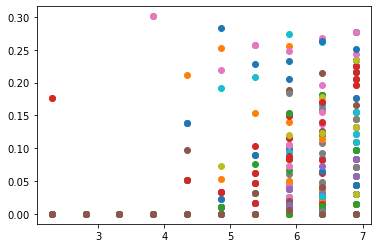

In [28]:
for c in C.components:
    v=Y_c['binary mean'].loc[c].fillna(0)
    plt.scatter(np.log10(v.index+1),np.log10(v.values+1))

In [32]:
C.partitions['size']

{197: ['ERR4775687', 'ERR4775741'],
 642: [],
 2088: [],
 6789: ['ERR4775575', 'ERR4775772'],
 22070: ['SRR6468562',
  'ERR4775994',
  'ERR4775734',
  'ERR4775586',
  'ERR4775593',
  'ERR4775561',
  'ERR4775878',
  'SRR6468563'],
 71742: ['ERR4775811',
  'ERR4776049',
  'ERR4775898',
  'ERR4775614',
  'ERR4775643',
  'ERR4775789',
  'SRR6468671',
  'ERR4775905',
  'ERR4775975',
  'ERR4775810',
  'ERR4775839',
  'ERR4775940',
  'ERR4775636',
  'ERR4775537',
  'ERR4775657',
  'ERR4775673',
  'ERR4775817',
  'ERR4775578',
  'ERR4775765',
  'ERR4775874',
  'ERR4775666',
  'ERR4775923',
  'ERR4775725',
  'ERR4775796',
  'ERR4775823',
  'ERR4775884',
  'ERR4775530',
  'ERR4775857',
  'ERR4775664',
  'ERR4775554',
  'ERR4775694',
  'ERR4775622',
  'ERR4775607',
  'ERR4775780',
  'ERR4775762',
  'ERR4775629',
  'ERR4775831',
  'ERR4775779'],
 233210: ['ERR4775855',
  'SRR6468570',
  'ERR4775824',
  'ERR4776021',
  'ERR4775893',
  'ERR4775865',
  'ERR4775552',
  'ERR4775846',
  'ERR4775966',
  

In [42]:
diagnosis = (metadata['diagnosis']).map({'CD':'U','UC':'U','IBS-C':'U','IBS-D':'U','H':'H'})


In [43]:
diagnosis_partition = {}
diagnosis_partition['H']=list(diagnosis[diagnosis=='H'].index)
diagnosis_partition['U']=list(diagnosis[diagnosis=='U'].index)

In [45]:
C.add_partition(partition=diagnosis_partition,name='diagnosis')

In [46]:
Z_c = C.get_observables(zipf=True,out=True,grouping='diagnosis')

 > > > observables diagnosis  

 > > > original processing: done
 > > > binary processing: done
 > > > relative processing: done
 > > > zipf processing: done
 < < < 	 < < < 



In [47]:
Z_c

original mean                original var  \
                                               H             U             H   
taxon_name                                                                     
Haemophilus parainfluenzae            677.093023   3256.340206  1.212993e+07   
Proteiniphilum saccharofermentans     226.930233      0.000000  4.428770e+06   
Thermobaculum terrenum                 19.965116      0.000000  3.428010e+04   
Bifidobacterium adolescentis        81279.616279  98422.201031  2.364819e+10   
Lactobacillus amylovorus                0.000000    506.582474  0.000000e+00   
...                                          ...           ...           ...   
Lactobacillus vaginalis                 0.000000    361.201031  0.000000e+00   
Intestinimonas butyriciproducens     6985.279070   2362.742268  3.218467e+08   
Lactobacillus salivarius                0.000000    780.871134  0.000000e+00   
Bifidobacterium angulatum            1818.569767     63.845361  2.035455e+08   
Desulfitobacterium metallireducens    136.279070     10.536082  5.681774e+05   

                                                 binary mean            \
                                               U           H         U   
taxon_name                                                               
Haemophilus parainfluenzae          4.152505e+08    0.046512  0.067010   
Proteiniphilum saccharofermentans   0.000000e+00    0.011628  0.000000   
Thermobaculum terrenum              0.000000e+00    0.011628  0.000000   
Bifidobacterium adolescentis        1.188547e+11    0.453488  0.278351   
Lactobacillus amylovorus            3.112512e+07    0.000000  0.010309   
...                                          ...         ...       ...   
Lactobacillus vaginalis             1.274990e+07    0.000000  0.010309   
Intestinimonas butyriciproducens    7.130937e+07    0.279070  0.154639   
Lactobacillus salivarius            4.525453e+07    0.000000  0.030928   
Bifidobacterium angulatum           1.744811e+05    0.058140  0.025773   
Desulfitobacterium metallireducens  2.153575e+04    0.034884  0.005155   

                                   binary var           relative mean  \
                                            H         U             H   
taxon_name                                                              
Haemophilus parainfluenzae           0.044870  0.062844      0.000342   
Proteiniphilum saccharofermentans    0.011628  0.000000      0.000033   
Thermobaculum terrenum               0.011628  0.000000      0.000002   
Bifidobacterium adolescentis         0.250752  0.201912      0.054625   
Lactobacillus amylovorus             0.000000  0.010256      0.000000   
...                                       ...       ...           ...   
Lactobacillus vaginalis              0.000000  0.010256      0.000000   
Intestinimonas butyriciproducens     0.203557  0.131403      0.001471   
Lactobacillus salivarius             0.000000  0.030127      0.000000   
Bifidobacterium angulatum            0.055404  0.025239      0.000234   
Desulfitobacterium metallireducens   0.034063  0.005155      0.000023   

                                              relative var                \
                                           U             H             U   
taxon_name                                                                 
Haemophilus parainfluenzae          0.000980  3.753881e-06  4.075944e-05   
Proteiniphilum saccharofermentans   0.000000  9.355297e-08  0.000000e+00   
Thermobaculum terrenum              0.000000  5.353481e-10  0.000000e+00   
Bifidobacterium adolescentis        0.036622  1.607222e-02  1.125425e-02   
Lactobacillus amylovorus            0.000175  0.000000e+00  3.152427e-06   
...                                      ...           ...           ...   
Lactobacillus vaginalis             0.000285  0.000000e+00  1.263427e-05   
Intestinimonas butyriciproducens    0.000903  8.815942e-06  8.451027e-06   
Lactobacillus sali